                            
           # Bank Marketing Data Analysis- Using Logistic Regression Algorithm

Read the Bank marketing data csv file and display the total record in file

In [1]:
bankDF=spark.read.format("csv").option("header","true").option("inferSchema","true")\
.load("/home/farjana/Data/bank-additional-full.csv")
bankDF.count()

41188

Import pyspark and python functions

In [2]:
import pandas as pd
from pyspark.sql.functions import *
import numpy as np
from pyspark.ml.feature import RFormula
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
%matplotlib inline

Create indexer for columns

In [3]:
housingIndxr=StringIndexer().setInputCol("housing").setOutputCol("housingIndx")
loanIndxr=StringIndexer().setInputCol("loan").setOutputCol("personalloanIndx")
termdepositIndxr=StringIndexer().setInputCol("y").setOutputCol("termdepositIndx")
maritalIndxr=StringIndexer().setInputCol("marital").setOutputCol("maritalIndx")
defaultIndxr=StringIndexer().setInputCol("default").setOutputCol("defaultIndx")
bankDF1=housingIndxr.fit(bankDF).transform(bankDF)
bankDF2=loanIndxr.fit(bankDF1).transform(bankDF1)
bankDF3=termdepositIndxr.fit(bankDF2).transform(bankDF2)
bankDF4=maritalIndxr.fit(bankDF3).transform(bankDF3)
bankDF5=defaultIndxr.fit(bankDF4).transform(bankDF4)
bankfinalDF=bankDF5.drop("emp.var.rate","cons.price.idx","cons.conf.idx","nr.employed")


                Summary statistics for numeric variables

In [4]:
numeric_features=[t[0] for t in bankfinalDF.dtypes if t[1]=='int']
bankfinalDF.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,41188,40.02406040594348,10.421249980934045,17,98
duration,41188,258.2850101971448,259.2792488364655,0,4918
campaign,41188,2.567592502670681,2.770013542902322,1,56
pdays,41188,962.4754540157328,186.91090734474153,0,999
previous,41188,0.17296299893172767,0.49490107983929055,0,7


                    Correlation between independent variables

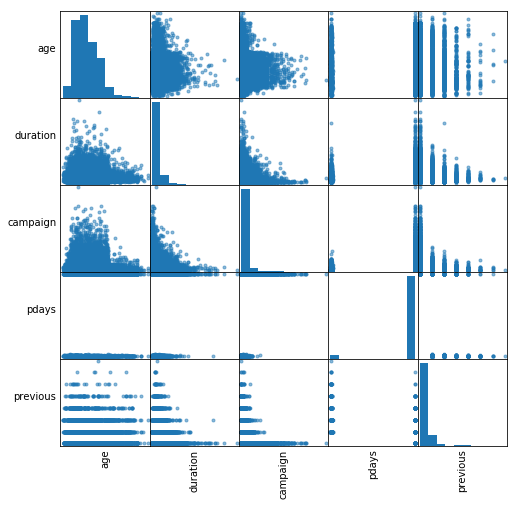

In [5]:
numeric_data=bankfinalDF.select(numeric_features).toPandas()
axs=pd.scatter_matrix(numeric_data,figsize=(8,8))
n=len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

                    Apply Logistic Regression to the dataset

Create RFormula

In [6]:
supervised1 =RFormula(formula="termdepositIndx~personalloanIndx")
fittedRF1=supervised1.fit(bankfinalDF)
preparedDF1=fittedRF1.transform(bankfinalDF)

Randomly split the dataset as traindataset and testdataset

In [7]:
train1,test1=preparedDF1.randomSplit([0.7,0.3])

Apply the Logistic Regression to the traindataset and calculate the accuracy for the traindataset

In [8]:
lr=LogisticRegression(labelCol="label",featuresCol="features",maxIter=10)
fittedlr1=lr.fit(train1)
trainmatch1=fittedlr1.transform(train1).select("label","prediction").where("label==prediction").count()
totaltrain1=fittedlr1.transform(train1).select("label","prediction").count()
trainmismatch1=totaltrain1-trainmatch1
accuracytrain1=(1.*trainmatch1/totaltrain1)*100
print("Totaltraindata:"+str(totaltrain1))
print("missmatchdata :"+str(trainmismatch1))
print("TrainAccuracy :"+ str(accuracytrain1))

Totaltraindata:28831
missmatchdata :3236
TrainAccuracy :88.7759703097


Apply the Logistic Regression to the testdataset and calculate the accuracy for the testdataset

In [9]:
testmatch1=fittedlr1.transform(test1).select("label","prediction").where("label==prediction").count()
totaltest1=fittedlr1.transform(test1).select("label","prediction").count()
testmismatch1=totaltest1-testmatch1
accuracytest1=(1.*testmatch1/totaltest1)*100
print("Totaltestdata :"+str(totaltest1))
print("missmatchdata :"+str(testmismatch1))
print("TestAccuracy  :"+ str(accuracytest1))

Totaltestdata :12357
missmatchdata :1404
TestAccuracy  :88.6380189366


Create RFormula

In [10]:
supervised2 =RFormula(formula="personalloanIndx~defaultIndx+termdepositIndx")
fittedRF2=supervised2.fit(bankfinalDF)
preparedDF2=fittedRF2.transform(bankfinalDF)

Randomly split the dataset as traindataset and testdataset

In [11]:
train2,test2=preparedDF2.randomSplit([0.7,0.3])

Apply the Logistic Regression to the traindataset and calculate the accuracy for the traindataset

In [12]:
lr=LogisticRegression()
fittedlr2=lr.fit(train2)
trainmatch2=fittedlr2.transform(train2).select("label","prediction").where("label==prediction").count()
totaltrain2=fittedlr2.transform(train2).select("label","prediction").count()
trainmismatch2=totaltrain2-trainmatch2
accuracytrain2=(1.*trainmatch2/totaltrain2)*100
print("Totaltraindata:"+str(totaltrain2))
print("missmatchdata :"+str(trainmismatch2))
print("TrainAccuracy :"+ str(accuracytrain2))

Totaltraindata:28797
missmatchdata :5108
TrainAccuracy :82.2620411848


Apply the Logistic Regression to the testdataset and calculate the accuracy for the testdataset

In [13]:
testmatch2=fittedlr2.transform(test2).select("label","prediction").where("label==prediction").count()
totaltest2=fittedlr2.transform(test2).select("label","prediction").count()
testmismatch2=totaltest2-testmatch2
accuracytest2=(1.*testmatch2/totaltest2)*100
print("Totaltestdata :"+str(totaltest2))
print("missmatchdata :"+str(testmismatch2))
print("TestAccuracy  :"+ str(accuracytest2))

Totaltestdata :12391
missmatchdata :2130
TestAccuracy  :82.8101041078
